In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline


In [38]:
#Importing the dataset
df=pd.read_csv("Melbourne_housing_FULL.csv")

In [39]:
#Checking for top 10 rows
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


## Exploratory Data analysis

In [40]:
#Size of the data
df.shape

(34857, 21)

In [41]:
#Checking for the distribution of the data
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [42]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

#### We see that suburb, method, seller, address, type, council area, are all categorical variables. In addition, the Date variable needs to be converted to a date object

In [43]:
#Viewing the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [44]:
#Converting to cstegorical type
cols=['Suburb', 'Address','Type','Method', 'SellerG','CouncilArea','Regionname']
for c in cols:
    df[c]=df[c].astype('category')

In [45]:
#Checking if the variables have become categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null float64
dtypes: category(7), float64(12), int64(1), obj

In [46]:
#Converting the date object
df['Date']=pd.to_datetime(df['Date'])

In [11]:
#Finally checking for all the datatypes
df.dtypes

Suburb                 category
Address                category
Rooms                     int64
Type                   category
Price                   float64
Method                 category
SellerG                category
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea            category
Lattitude               float64
Longtitude              float64
Regionname             category
Propertycount           float64
dtype: object

### Numeric Variables

In [47]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [48]:
#The Postcode should be categorical.So now we convert the postcode from numerical to categorical
nums=['Postcode']
for n in nums:
    df['Postcode']=df.Postcode.astype('category')

In [14]:
#Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null datetime64[ns]
Distance         34856 non-null float64
Postcode         34856 non-null category
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null float64
dtypes: category(8), datetime64[ns](1)

In [49]:
#Finding the correlation betwen Rooms and Bedroom2
print(df['Rooms'].corr(df['Bedroom2']))
print(df['Rooms'].corr(df['Bathroom']))

0.9467546231299163
0.611825859441652


### Duplicate variables
#### We see a high correlation between bedroom and number of rooms, both of them seem similar as both mention the number of people that can stay. So we can try to see if we can remove either one of the variables

In [50]:
df['Rooms v Bedroom']=df['Rooms']-df['Bedroom2']

In [51]:
df.shape

(34857, 22)

In [52]:
## So we observe that differences between the variables are extremely minimal .So we can remove the variables
df=df.drop(['Rooms','Rooms v Bedroom'],1)

In [53]:
df.shape ## We see that 2 columns have been dropped

(34857, 20)

### Feature Engineering

#### The dataset has a column 'YearBuilt' that specifies the age of a property. We can just divide it into categories like 'Ancient' or 'Non-Ancient' based on if it's less than or greater than 50 years


In [54]:
df['Age']=2017-df['YearBuilt']

In [55]:
#Identify historic homes
df['Historic']=np.where(df['Age']>50,'Historic','Contemporary')

In [56]:
df['Historic'].value_counts()

Contemporary    27806
Historic         7051
Name: Historic, dtype: int64

#### So we observe that there are 27806 Contemporary homes and 7051 historic homes

In [57]:
#Converting the type of column 'Historic'
hist=['Historic']
for i in hist:
    df['Historic']=df['Historic'].astype('category')

In [58]:
#Verifying change
df.dtypes

Suburb                 category
Address                category
Type                   category
Price                   float64
Method                 category
SellerG                category
Date             datetime64[ns]
Distance                float64
Postcode               category
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea            category
Lattitude               float64
Longtitude              float64
Regionname             category
Propertycount           float64
Age                     float64
Historic               category
dtype: object

### Missing data

In [59]:
df.isna().sum()

Suburb               0
Address              0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Age              19306
Historic             0
dtype: int64

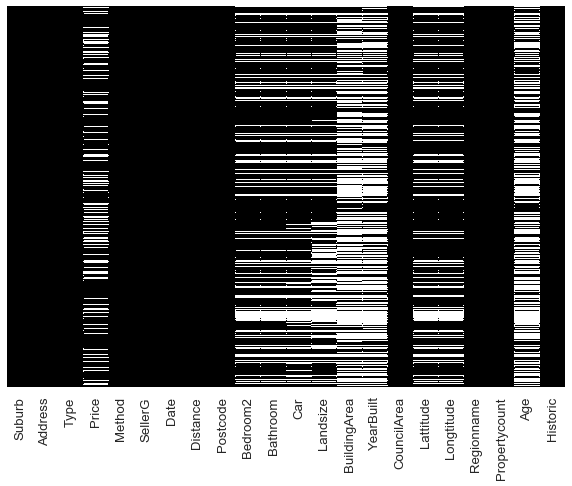

In [60]:
## visualize the missing data
fig, ax=plt.subplots(figsize=(10,7))
sns.set(font_scale=1.2)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Greys_r')
plt.show()

In [61]:
#Percentage of missing values
df.isnull().sum()/len(df)*100

Suburb            0.000000
Address           0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
Age              55.386293
Historic          0.000000
dtype: float64

#### There are a significant amount of missing values in Price, Bathroom, Car, Landsize, Building Area, YearBuilt, Council Area, Lattitude, and Longitude. To allow for a more complete analysis, observations missing any data will be removed from the dataset

In [80]:
# Remove rows missing data
df = df.dropna()

# Confirm that observations missing data were removed  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8842 entries, 2 to 34856
Data columns (total 22 columns):
Suburb           8842 non-null category
Address          8842 non-null category
Type             8842 non-null category
Price            8842 non-null float64
Method           8842 non-null category
SellerG          8842 non-null category
Date             8842 non-null datetime64[ns]
Distance         8842 non-null float64
Postcode         8842 non-null category
Bedroom2         8842 non-null float64
Bathroom         8842 non-null float64
Car              8842 non-null float64
Landsize         8842 non-null float64
BuildingArea     8842 non-null float64
YearBuilt        8842 non-null float64
CouncilArea      8842 non-null category
Lattitude        8842 non-null float64
Longtitude       8842 non-null float64
Regionname       8842 non-null category
Propertycount    8842 non-null float64
Age              8842 non-null float64
Historic         8842 non-null category
dtypes: category(9

### Outliers 

#### While observing the descriptive statistics of the dataset, we observed that landsize and buildingarea values as 0 which is odd. So we will investigate further

In [81]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,8842.0,1.092554e+06,679110.471353,131000.00000,641250.000000,900000.0000,1.345000e+06,9.000000e+06
Distance,8842.0,1.118741e+01,6.810991,0.00000,6.400000,10.2000,1.390000e+01,4.740000e+01
Bedroom2,8842.0,3.076001e+00,0.966521,0.00000,2.000000,3.0000,4.000000e+00,1.200000e+01
Bathroom,8842.0,1.645781e+00,0.722307,1.00000,1.000000,2.0000,2.000000e+00,9.000000e+00
Car,8842.0,1.691812e+00,0.976664,0.00000,1.000000,2.0000,2.000000e+00,1.000000e+01
Landsize,8842.0,5.229755e+02,1062.597994,0.00000,211.000000,477.0000,6.520000e+02,4.280000e+04
BuildingArea,8842.0,1.500694e+02,87.499764,1.00000,100.000000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8842.0,1.965692e+03,37.057287,1196.00000,1945.000000,1970.0000,2.000000e+03,2.019000e+03
Lattitude,8842.0,-3.780468e+01,0.090367,-38.17436,-37.858788,-37.7987,-3.774930e+01,-3.740720e+01
Longtitude,8842.0,1.449913e+02,0.118965,144.42379,144.919700,144.9983,1.450645e+02,1.455264e+02


In [82]:
df[df['Age']>800]

,Suburb,Address,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
16424,Mount Waverley,5 Armstrong St,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149.0,3.0,...,807.0,117.0,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0,821.0,Historic


In [83]:
df[df['BuildingArea']==0]

,Suburb,Address,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic


In [84]:
df[df['Landsize']==0]

,Suburb,Address,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
25,Abbotsford,123/56 Nicholson St,u,750000.0,S,Biggin,2016-12-11,2.5,3067.0,2.0,...,0.0,94.00,2009.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0,8.0,Contemporary
42,Abbotsford,6/219 Nicholson St,u,500000.0,S,Collins,2016-06-18,2.5,3067.0,2.0,...,0.0,60.00,1970.0,Yarra City Council,-37.80150,144.99720,Northern Metropolitan,4019.0,47.0,Contemporary
57,Abbotsford,11/205 Gipps St,u,470000.0,S,Nelson,2016-07-26,2.5,3067.0,1.0,...,0.0,50.00,2013.0,Yarra City Council,-37.80550,144.99610,Northern Metropolitan,4019.0,4.0,Contemporary
67,Airport West,50 Bedford St,h,730000.0,VB,Nelson,2016-03-12,13.5,3042.0,3.0,...,0.0,145.00,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
68,Airport West,50 Bedford St,h,770000.0,SP,Nelson,2017-04-03,13.5,3042.0,3.0,...,0.0,145.00,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,52.0,Historic
88,Airport West,13 Etzel St,h,805000.0,S,Nelson,2016-10-12,13.5,3042.0,3.0,...,0.0,105.00,1950.0,Moonee Valley City Council,-37.72170,144.87830,Western Metropolitan,3464.0,67.0,Historic
155,Albert Park,4a Gatehouse La,h,1370000.0,S,Greg,2016-12-06,3.3,3206.0,3.0,...,0.0,85.00,2000.0,Port Phillip City Council,-37.84510,144.95110,Southern Metropolitan,3280.0,17.0,Contemporary
177,Albert Park,13/52 Moubray St,u,442500.0,S,Marshall,2017-02-25,3.3,3206.0,1.0,...,0.0,34.00,1970.0,Port Phillip City Council,-37.84210,144.95170,Southern Metropolitan,3280.0,47.0,Contemporary
217,Alphington,5/5 Yarana Rd,u,390000.0,VB,Nelson,2016-05-22,6.4,3078.0,2.0,...,0.0,60.00,1960.0,Darebin City Council,-37.77730,145.03140,Northern Metropolitan,2211.0,57.0,Historic
219,Alphington,1/14 Fulham Rd,u,512000.0,S,Love,2017-02-25,6.4,3078.0,2.0,...,0.0,61.00,1965.0,Darebin City Council,-37.78050,145.02620,Northern Metropolitan,2211.0,52.0,Historic


#### After additional research, I determined that a zero land size could be indicative of 'zero-lot-line' homes - residential real estate in which the structure comes up to or very near the edge of the property line. Therefore, these observations are valid and will remain the data set.
#### However, the observation with a 'zero' BuildingArea will be removed because it is not possible for a home to have a size of zero. Also, this observation is priced usually high at $8.4M (the outlier identified earlier), further confirming a possible error in the data point. For these two reasons, this observation will be removed.

In [85]:
# Dealing with outliers
df=df[df['BuildingArea']!=0]

# Confirm removal
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,8842.0,1.092554e+06,679110.471353,131000.00000,641250.000000,900000.0000,1.345000e+06,9.000000e+06
Distance,8842.0,1.118741e+01,6.810991,0.00000,6.400000,10.2000,1.390000e+01,4.740000e+01
Bedroom2,8842.0,3.076001e+00,0.966521,0.00000,2.000000,3.0000,4.000000e+00,1.200000e+01
Bathroom,8842.0,1.645781e+00,0.722307,1.00000,1.000000,2.0000,2.000000e+00,9.000000e+00
Car,8842.0,1.691812e+00,0.976664,0.00000,1.000000,2.0000,2.000000e+00,1.000000e+01
Landsize,8842.0,5.229755e+02,1062.597994,0.00000,211.000000,477.0000,6.520000e+02,4.280000e+04
BuildingArea,8842.0,1.500694e+02,87.499764,1.00000,100.000000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8842.0,1.965692e+03,37.057287,1196.00000,1945.000000,1970.0000,2.000000e+03,2.019000e+03
Lattitude,8842.0,-3.780468e+01,0.090367,-38.17436,-37.858788,-37.7987,-3.774930e+01,-3.740720e+01
Longtitude,8842.0,1.449913e+02,0.118965,144.42379,144.919700,144.9983,1.450645e+02,1.455264e+02


### Univariate and Bivariate analysis

In [86]:
# Dependant variable we are trying to predict is price. The variable appears to be normally dustributed and to the right. The variable appears to be normally distributed and skewed to the right. The majority of the houses are around $900k.
# There is only 1 outlier that priced about 8M$

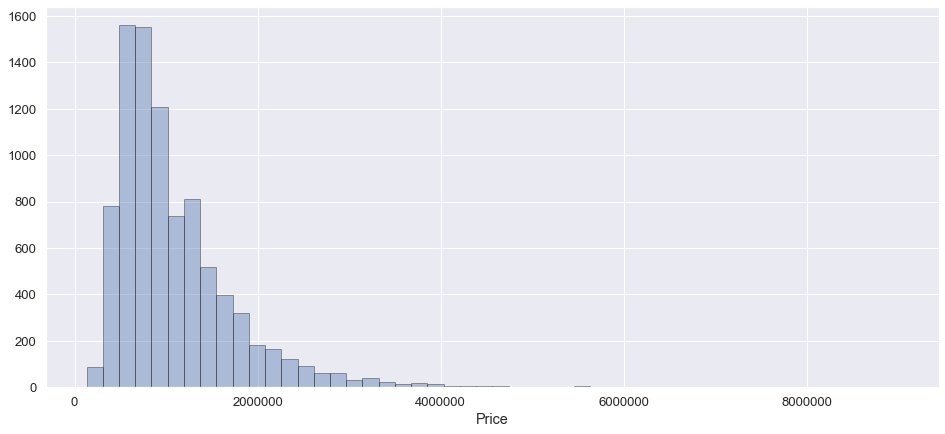

In [87]:
plt.figure(figsize=(16,7))
sns.distplot(df['Price'], kde = False,hist_kws=dict(edgecolor="k"))

In [88]:
print(df[df['Price'].isnull()])

Empty DataFrame
Columns: [Suburb, Address, Type, Price, Method, SellerG, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount, Age, Historic]
Index: []

[0 rows x 22 columns]


### Bivariate Relationships

In [89]:
#### Now, we take a look at the relationship between the target variable price and the categorical features.

df.select_dtypes(['category']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode',
       'CouncilArea', 'Regionname', 'Historic'],
      dtype='object')

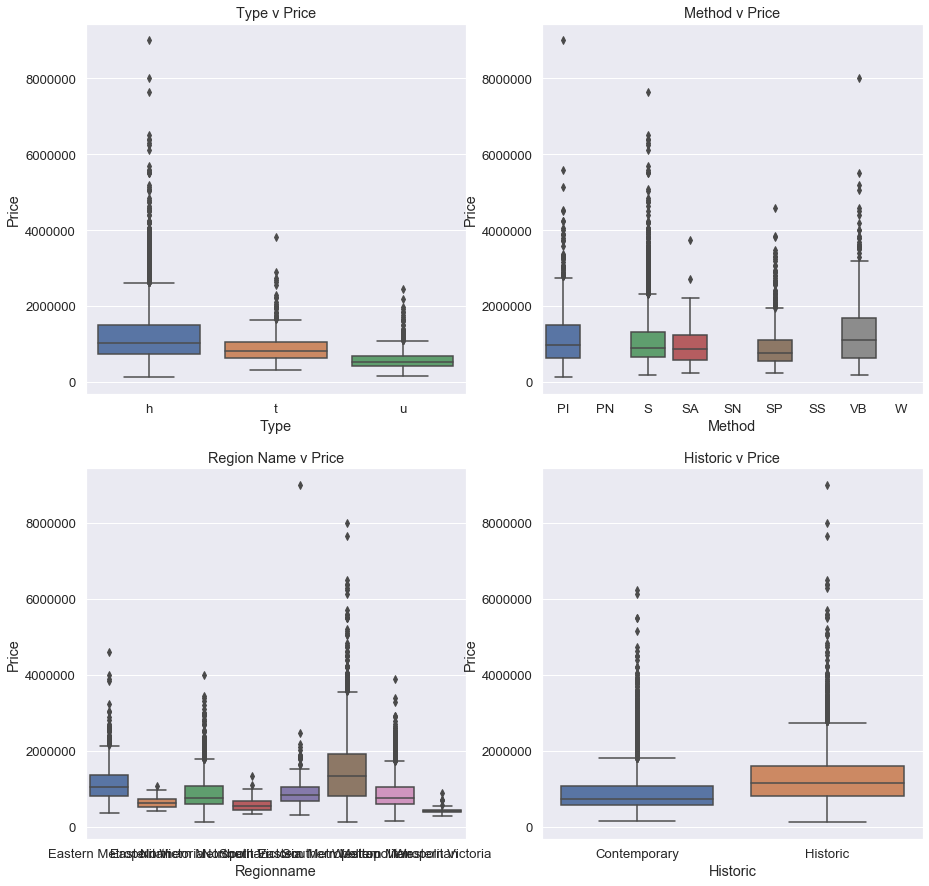

In [90]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = df, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = df, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')

# Plot [1,0]
sns.boxplot(x = 'Regionname', y = 'Price', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')

# Plot [1,1]
sns.boxplot(x = 'Historic', y = 'Price', data = df, ax = axes[1,1])
axes[1,1].set_xlabel('Historic')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Historic v Price')

plt.show()

#### Correlation plot

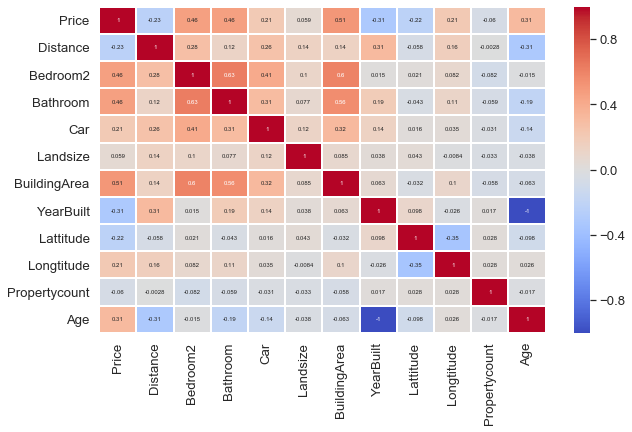

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm',linewidth=1, annot=True, annot_kws={"size":6})

#####  Weak positive correlation :Age and Price
##### Moderate positive correlation: Bedrooms and Price, Bathroom and Price, Building Area and Price

### Fitting a model to the data

### LINEAR REGRESSION MODEL

In [92]:
#Identify numeric features
df.select_dtypes(['int64','float64']).columns

Index(['Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [93]:
#Select the feature variables
X=df[['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount', 'Age']]
X.shape

(8842, 11)

In [94]:
#Selecting the target variable
y=df['Price']
y.shape

(8842,)

In [95]:
# Train- test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size = .20, random_state= 0)

In [96]:
#Fit the model
from sklearn.linear_model import LinearRegression

In [97]:
regressor=LinearRegression()

In [98]:
#Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
#Prediction
y_pred=regressor.predict(X_test)
y_pred

array([1455754.07299396, 1189339.00092718,  625145.8771919 , ...,
       1115321.52080825,  839678.28771293, 1055565.57469058])

### Regression Evaluation Metrics

In [102]:
from sklearn import metrics

In [103]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 280741.31735656306
MSE: 192946579652.5937
RMSE: 439256.84929502656


In [104]:
#R-squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.5824688347424258


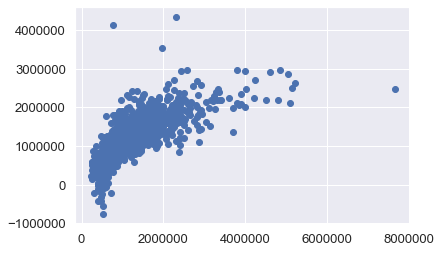

In [105]:
## Analyze the residuals
plt.scatter(y_test, y_pred)

In [120]:
#Applying Ridge regression
from sklearn.linear_model import Ridge
from sklearn import linear_model
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [123]:
y_pred1=ridge.predict(X_test)
y_pred1

array([1451845.47835496, 1189457.53903821,  625555.12017247, ...,
       1116785.84799215,  841023.41025242, 1052842.55984479])

In [125]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:',metrics.mean_squared_error(y_test,y_pred1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

MAE: 280711.97111129115
MSE: 193019809733.21497
RMSE: 439340.19817587256
